**1 .Переменная names содержит в себе строку, где хранятся имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]**

Переменная names уже задана.

In [21]:
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3'
names_list = names.split(', ')
names_list

['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname3']

**2. В переменной df содержатся данные**



**Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.**

In [47]:
df = pd.DataFrame({'client_id': np.random.randint(1, 10000, 30),
                   'sex': np.random.choice([0, 1], 30),
                   'wealth': np.random.choice(['low', 'medium', 'high'], 30),
                   'age': np.random.randint(20, 70, 30)})
df.head()

,client_id,sex,wealth,age
0,5660,1,medium,41
1,7544,1,medium,34
2,3940,1,medium,34
3,6945,1,high,64
4,5899,0,low,66


In [48]:
medium_35 = df.query("wealth == 'medium' and age > 35")
medium_35

,client_id,sex,wealth,age
0,5660,1,medium,41
5,3466,0,medium,46
7,3583,0,medium,43
8,2314,1,medium,47
10,2883,0,medium,38
11,3810,0,medium,61
15,4771,1,medium,62
19,8869,0,medium,56
22,3216,1,medium,54


**3. Ваш коллега-новичок перепутал названия колонок в таблице df и прислал вам такой вариант:**


In [49]:
df = pd.DataFrame({'Клиент id': np.random.randint(1, 10000, 30),
                   'Пол': np.random.choice([0, 1], 30),
                   'Благосостояние': np.random.choice(['low', 'medium', 'high'], 30),
                   'Возраст': np.random.randint(20, 70, 30)})
df.head()

,Клиент id,Пол,Благосостояние,Возраст
0,3240,1,high,45
1,3333,0,low,62
2,3590,0,medium,41
3,8156,1,low,35
4,8806,0,low,40


**Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.**

In [50]:
df = df.rename(columns={'Клиент id': 'client_id', 
                        'Пол' : 'sex', 
                        'Благосостояние' : 'wealth', 
                        'Возраст': 'age'})
df.head()

,client_id,sex,wealth,age
0,3240,1,high,45
1,3333,0,low,62
2,3590,0,medium,41
3,8156,1,low,35
4,8806,0,low,40


**4. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)**


In [51]:
df['older_than_30'] = df.age > 30
df.head()

,client_id,sex,wealth,age,older_than_30
0,3240,1,high,45,True
1,3333,0,low,62,True
2,3590,0,medium,41,True
3,8156,1,low,35,True
4,8806,0,low,40,True


**5. А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.**


In [52]:
unique_num = df.nunique()
unique_num

client_id        29
sex               2
wealth            3
age              23
older_than_30     2
dtype: int64

**6. У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:**

In [53]:
data = pd.DataFrame({'client_id': df.client_id.sample(10).values,
                   'amount': np.random.randint(1000, 100000, 10),
                   'date': np.random.randint(1000, 100000, 10)})
data.head()

,client_id,amount,date
0,6599,58915,1317
1,3679,97761,97676
2,9701,65227,58409
3,257,73274,31859
4,7158,86522,89370


**Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)**

**Предыдущий датафрейм загружен в переменную df, новый – в data**

In [54]:
full_data = data.merge(df, on='client_id')
full_data

,client_id,amount,date,sex,wealth,age,older_than_30
0,6599,58915,1317,1,high,61,True
1,3679,97761,97676,0,medium,63,True
2,9701,65227,58409,0,high,22,False
3,257,73274,31859,0,medium,53,True
4,7158,86522,89370,0,high,34,True
5,3590,63507,29513,0,medium,41,True
6,3240,25957,90990,1,high,45,True
7,8806,65696,90003,0,low,40,True
8,5206,95870,51036,1,low,48,True
9,8156,86611,62289,1,low,35,True


**8. Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей.**

* journey_id – уникальный id поездки

* user_id – id пользователя

* driver_id – id водителя

* taxi_id – id машины

* icon – тип поездки

* start_type – тип заказа (asap, reserved, delayed)

* start_at – время начала поездки

* start_lat – исходное местоположение пользователя, широта

* start_lon – исходное местоположение пользователя, долгота

* end_at – время окончания поездки

* end_lat – итоговое местоположение, широта

* end_lon – итоговое местоположение, долгота

* end_state – состояние заказа

* driver_start_lat – исходное местоположение водителя, широта

* driver_start_lon – исходное местоположение водителя, долгота

* arrived_at – время прибытия водителя

* source – платформа, с которой сделан заказ

* driver_score – оценка водителя клиентом

* rider_score – оценка клиента водителем
 

**Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя.**

**Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.**

 Может пригодиться: [read_csv()](https://lab.karpov.courses/learning/88/module/1103/lesson/9727/28493/133019/)

In [60]:
import pandas as pd
import numpy as np
import piplite
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
taxi = pd.read_csv('3_taxi_peru.csv', 
                   parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')

In [61]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [65]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

**9. Проверьте сколько из каждой платформы было сделано всего заказов. Ответ укажите значение в %, округлённое до целого.**

In [62]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [63]:
np.round(taxi.source.value_counts() / len(taxi) * 100)

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

**10. Чтобы показать разницу более наглядно, попробуем визуализировать показатели.**

**Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).**


In [69]:
taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() # сбрасываем индекс
              )
taxi_counts

,index,source
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


In [68]:
taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() # сбрасываем индекс
               .rename({'index':'source', 'source':'cnt'}, axis='columns')  # меняем значения на читаемые
              )
taxi_counts

,source,cnt
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


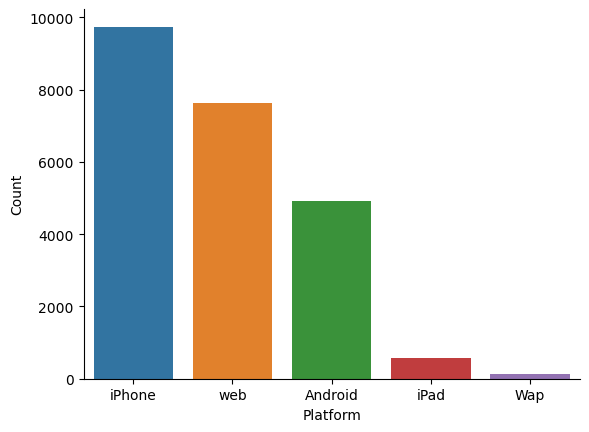

In [13]:
ax = sns.barplot(x='source', y='cnt', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

**11. Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.**

sns.countplot(taxi['source'])

**Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.**

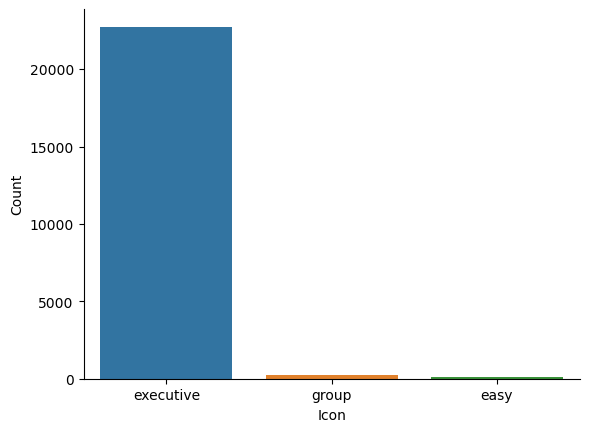

In [70]:
a = sns.countplot(x='icon', data=taxi)
a.set(xlabel='Icon', ylabel='Count')
sns.despine()
plt.show()

**12. Теперь попробуем построить более сложный график!**

**С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).**

**Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.**

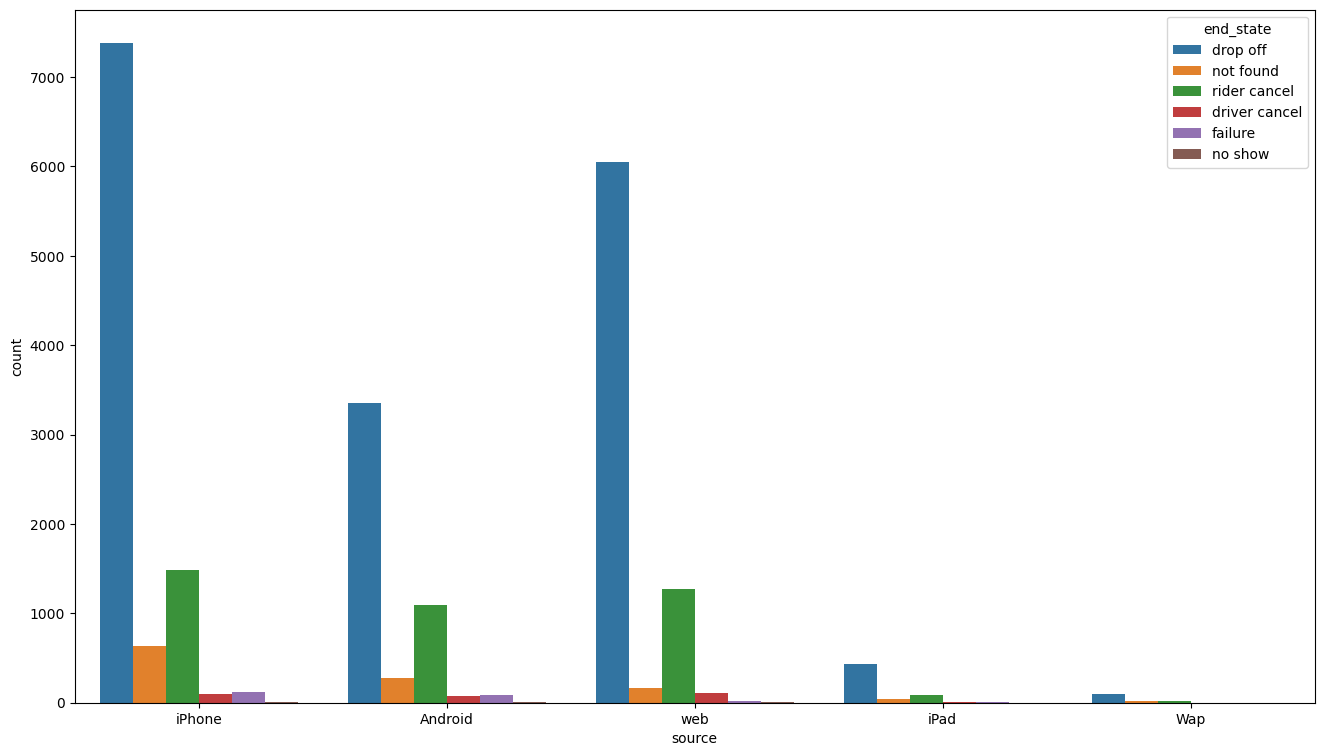

In [71]:
plt.figure(figsize=(16,9))
sns.countplot(data=taxi, hue='end_state', x='source')
plt.show() 

Проанализируйте полученный график, выберете верные пункты

* Больше всего заказов со статусом drop off совершено с платформы iPhone
* На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone
* На web отмененных поездок (rider cancel) меньше, чем на Android
* Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone
* Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы Android

**13. Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:**

1. Посчитайте частоту встречаемости каждой из оценок
2. Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
3. Сбросьте индексы
4. Переименуйте колонки в driver_score и percentage
5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6. Запишите результат в driver_score_counts
 

Полезные функции:

* [.mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html?highlight=mul#pandas.Series.mul) – умножение, более удобный вариант для использования в цепочке методов 
* [.round()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html#pandas.Series.round) – округление
* [.reset_index()](https://lab.karpov.courses/learning/88/module/1103/lesson/9728/28498/133078/) – сбросить индекс
* [.value_counts()](https://lab.karpov.courses/learning/88/module/1103/lesson/9727/28493/133026/) – сколько раз встречается каждое значение переменной

In [72]:
scores = taxi.driver_score.value_counts(normalize=True).mul(100).round(2) \
             .reset_index() \
             .rename(columns={'driver_score' : 'percentage',
                              'index' : 'driver_score'})
scores

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [73]:
driver_score_counts = scores.sort_values('driver_score', ascending=False)
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
3,3.0,2.97
5,2.0,0.81
4,1.0,1.23
2,0.0,14.30


**14. Теперь строим график!**


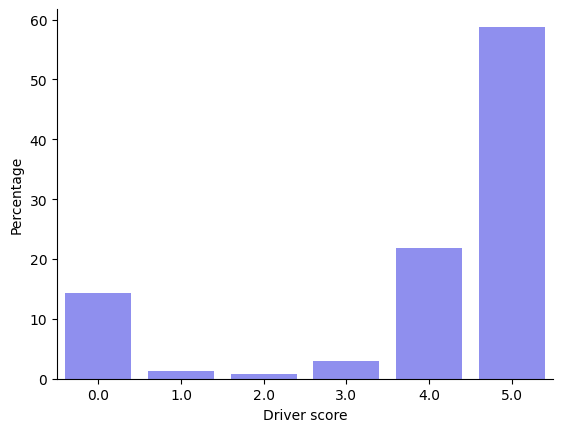

In [85]:
ax = sns.barplot(x='driver_score', y= 'percentage', data=driver_score_counts, color='blue', alpha=0.5)

ax.set(xlabel='Driver score', ylabel='Percentage')

sns.despine() # убрать часть рамки графика

plt.show()

**15.Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?**

In [81]:
scores = taxi.rider_score.value_counts(normalize=True).mul(100).round(2) \
             .reset_index() \
             .rename(columns={'rider_score' : 'percentage',
                              'index' : 'rider_score'})
rider_score_counts = scores.sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


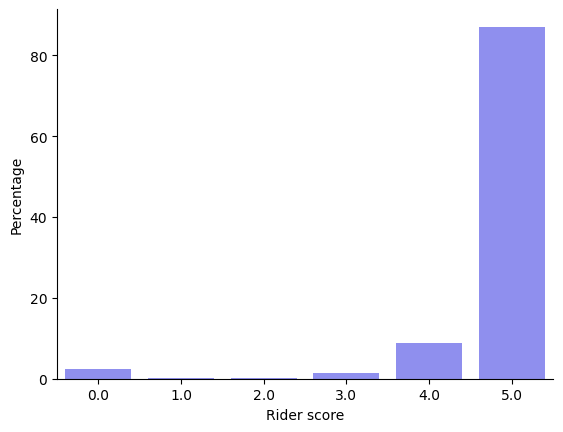

In [82]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.show()

Проанализируйте полученный график, выберете верные пункты

* Водители ставят больше 0, чем клиенты
* Водители ставят меньше 0, чем клиенты*
* Более 20% оценок составляют 4
* Более чем в 80% случаев водители поставили клиентам 5 звездочек*